# TC3283 DATA MINING PROJECT 1 DATA PREPARATION

Group Number: 13

Members:

1.   Ahmad Bulya Hakimi Bin Safawi (A183118)
2.   Mohamed Tariq Ziyad Bin Mohamed Jahangir (A182883)
3.   Muhammad Muaz Husaini Bin Rosli (A182954)

Title & Dataset: Mobile Price Classification

Dataset Background: Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc. He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies. Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

Sources: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification


# Import Libraries and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PART A. DATA EXPLORATION

## a. Data Quality Report (Descriptive Statistics)

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.shape

(2000, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### i) Quantitative Attribute

In [7]:
df_quantitative_feature = df[["battery_power", "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", "px_width", "ram", "sc_h", "sc_w", "talk_time"]]
df_quantitative_feature

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [8]:
df_quantitative_feature_quality_report = df_quantitative_feature.describe().swapaxes("index", "columns")

df_quantitative_feature_quality_report.insert(1, "missingPercentage", df_quantitative_feature.isnull().sum().sort_values(ascending=False)/len(df))
df_quantitative_feature_quality_report.insert(2, "cardinality", df_quantitative_feature.nunique())

df_quantitative_feature_quality_report.columns = ['Count', '% Miss.', 'Card.', 'Mean', 'Std. Dev.', 'Min.', '1st Qrt.', 'Median', '3rd Qrt.', 'Max.']
df_quantitative_feature_quality_report['Count'] = df_quantitative_feature_quality_report['Count'].astype(int)
df_quantitative_feature_quality_report

,Count,% Miss.,Card.,Mean,Std. Dev.,Min.,1st Qrt.,Median,3rd Qrt.,Max.
battery_power,2000,0.0,1094,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000,0.0,26,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000,0.0,20,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000,0.0,63,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000,0.0,10,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000,0.0,121,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000,0.0,8,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000,0.0,21,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000,0.0,1137,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000,0.0,1109,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


### ii) Qualitative Attribute

In [9]:
df_qualitative_feature = df[["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi", "price_range"]]
df_qualitative_feature

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
4,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...
1995,1,1,1,1,1,0,0
1996,1,1,0,1,1,1,2
1997,0,1,1,1,1,0,3
1998,0,0,1,1,1,1,0


For the purpose of observing the descriptive statistics and visualisation of the qualitative dataset, the following qualitative attributes data type are converted from integer to category.

In [10]:
df_qualitative_feature = df_qualitative_feature.astype("category")

In [11]:
df_qualitative_feature_quality_report = df_qualitative_feature.describe().swapaxes("index", "columns")

In [12]:
mode = []
mode_freq = []
mode_per = []

for column in df_qualitative_feature.columns:

    modes = df_qualitative_feature[column].value_counts().index[0]
    mode.append(modes)

    modesfreq = df_qualitative_feature[column].value_counts().values[0]
    mode_freq.append(modesfreq)

    modesper = (modesfreq/2000)*100
    mode_per.append(modesper)

In [13]:
second_mode = []
second_mode_freq = []
second_mode_per = []

for column in df_qualitative_feature.columns:

    duamodes = df_qualitative_feature[column].value_counts().index[1]
    second_mode.append(duamodes)

    duamodesfreq = df_qualitative_feature[column].value_counts().values[1]
    second_mode_freq.append(duamodesfreq)

    duamodesper = (duamodesfreq/2000)*100
    second_mode_per.append(duamodesper)

In [14]:
df_qualitative_feature_quality_report.insert(1, "missingPercentage", df_qualitative_feature.isnull().sum().sort_values(ascending=False)/len(df))
df_qualitative_feature_quality_report.insert(5, "mode_per", mode_per)
df_qualitative_feature_quality_report.insert(6, "second_mode", second_mode)
df_qualitative_feature_quality_report.insert(7, "second_mode_freq", second_mode_freq)
df_qualitative_feature_quality_report.insert(8, "second_mode_per", second_mode_per)

df_qualitative_feature_quality_report.columns = ['Count', '% Miss.', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']
df_qualitative_feature_quality_report

,Count,% Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
blue,2000,0.0,2,0,1010,50.50,1,990,49.50
dual_sim,2000,0.0,2,1,1019,50.95,0,981,49.05
four_g,2000,0.0,2,1,1043,52.15,0,957,47.85
three_g,2000,0.0,2,1,1523,76.15,0,477,23.85
touch_screen,2000,0.0,2,1,1006,50.30,0,994,49.70
wifi,2000,0.0,2,1,1014,50.70,0,986,49.30
price_range,2000,0.0,4,0,500,25.00,1,500,25.00


## b. Data Visualisation

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

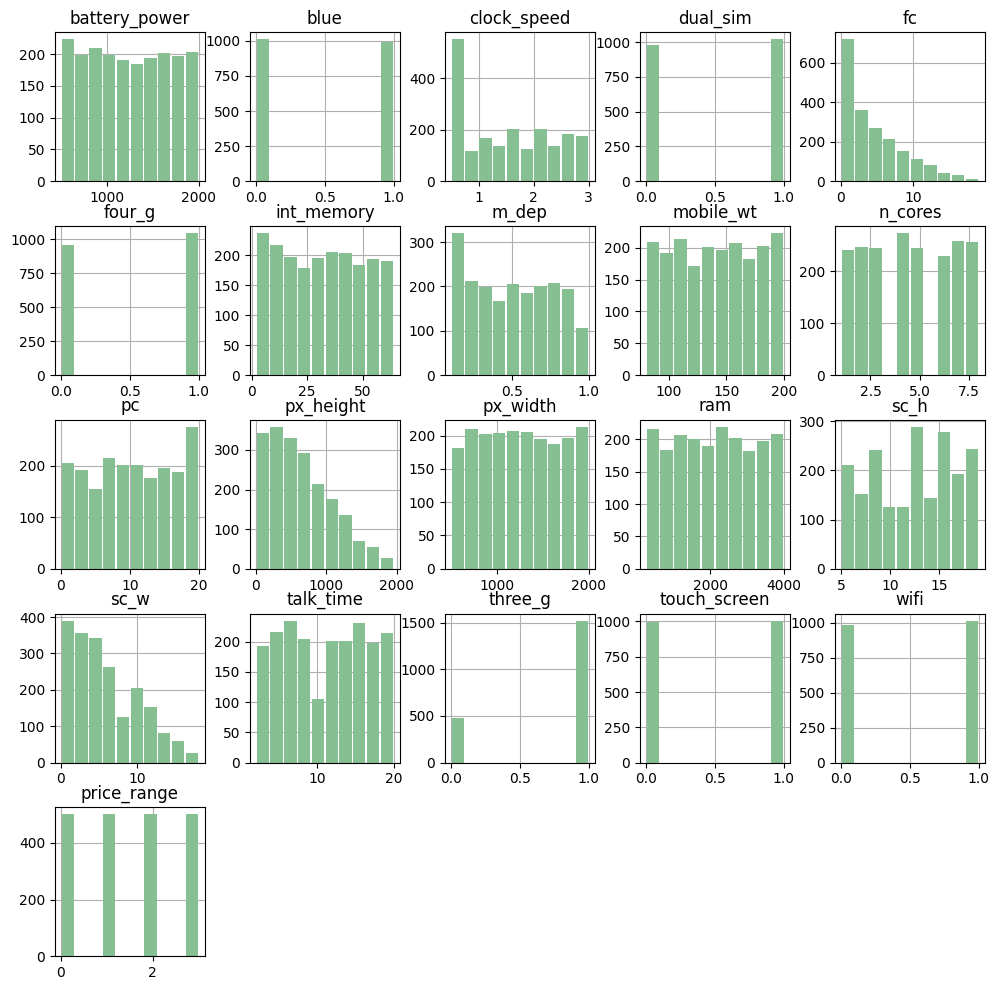

In [15]:
# Histogram
df.hist(figsize=(12,12), color='#86bf91', zorder=2, rwidth=0.9)

<Axes: >

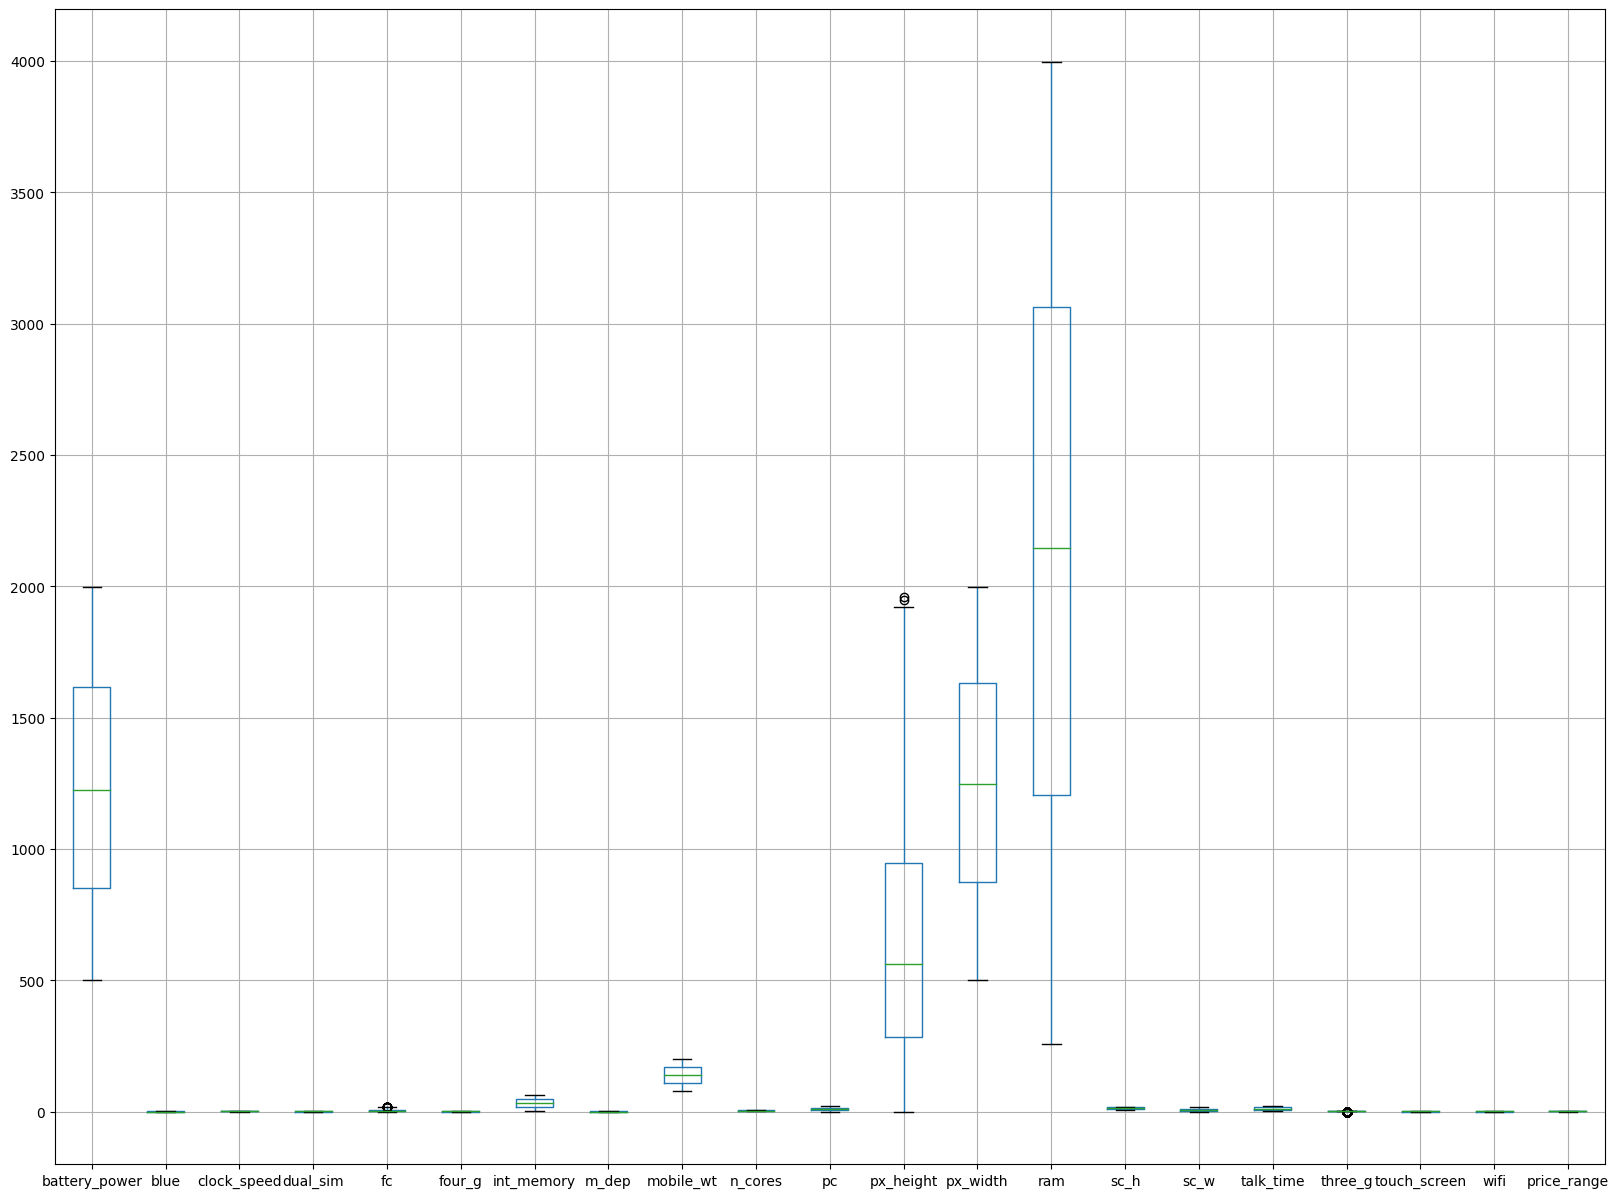

In [16]:
# Boxplot
df.boxplot(figsize=(20, 15))

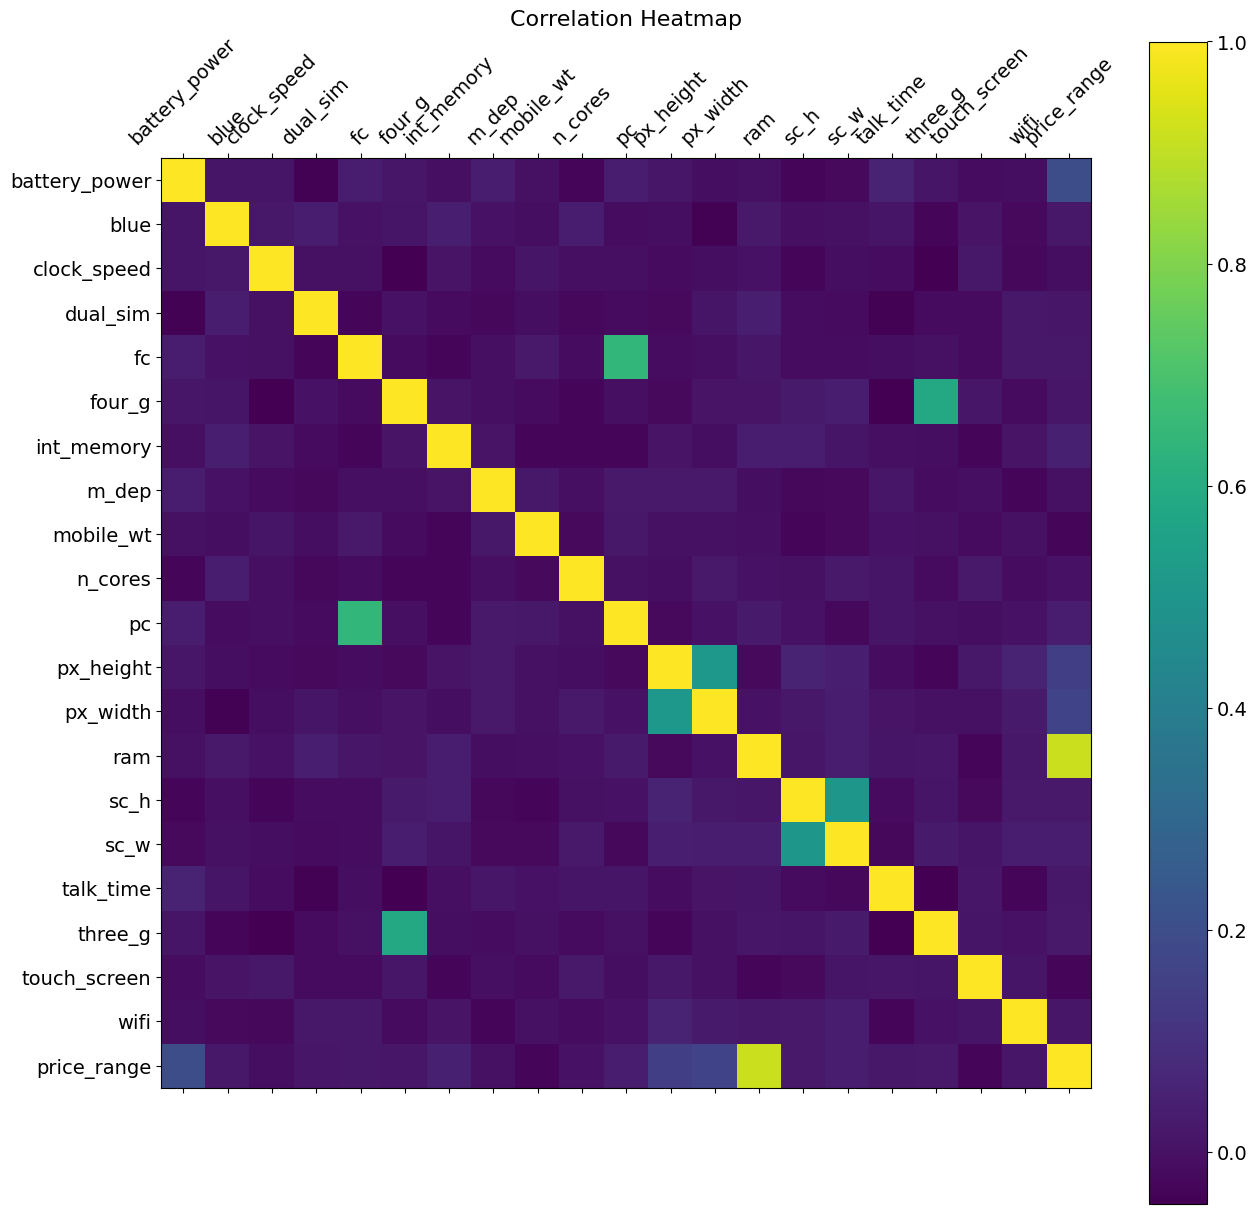

In [17]:
# Correlation Heatmap
f = plt.figure(figsize=(15, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Heatmap', fontsize=16);

array([[<Axes: xlabel='battery_power', ylabel='battery_power'>,
        <Axes: xlabel='blue', ylabel='battery_power'>,
        <Axes: xlabel='clock_speed', ylabel='battery_power'>,
        <Axes: xlabel='dual_sim', ylabel='battery_power'>,
        <Axes: xlabel='fc', ylabel='battery_power'>,
        <Axes: xlabel='four_g', ylabel='battery_power'>,
        <Axes: xlabel='int_memory', ylabel='battery_power'>,
        <Axes: xlabel='m_dep', ylabel='battery_power'>,
        <Axes: xlabel='mobile_wt', ylabel='battery_power'>,
        <Axes: xlabel='n_cores', ylabel='battery_power'>,
        <Axes: xlabel='pc', ylabel='battery_power'>,
        <Axes: xlabel='px_height', ylabel='battery_power'>,
        <Axes: xlabel='px_width', ylabel='battery_power'>,
        <Axes: xlabel='ram', ylabel='battery_power'>,
        <Axes: xlabel='sc_h', ylabel='battery_power'>,
        <Axes: xlabel='sc_w', ylabel='battery_power'>,
        <Axes: xlabel='talk_time', ylabel='battery_power'>,
        <Axes: xlab

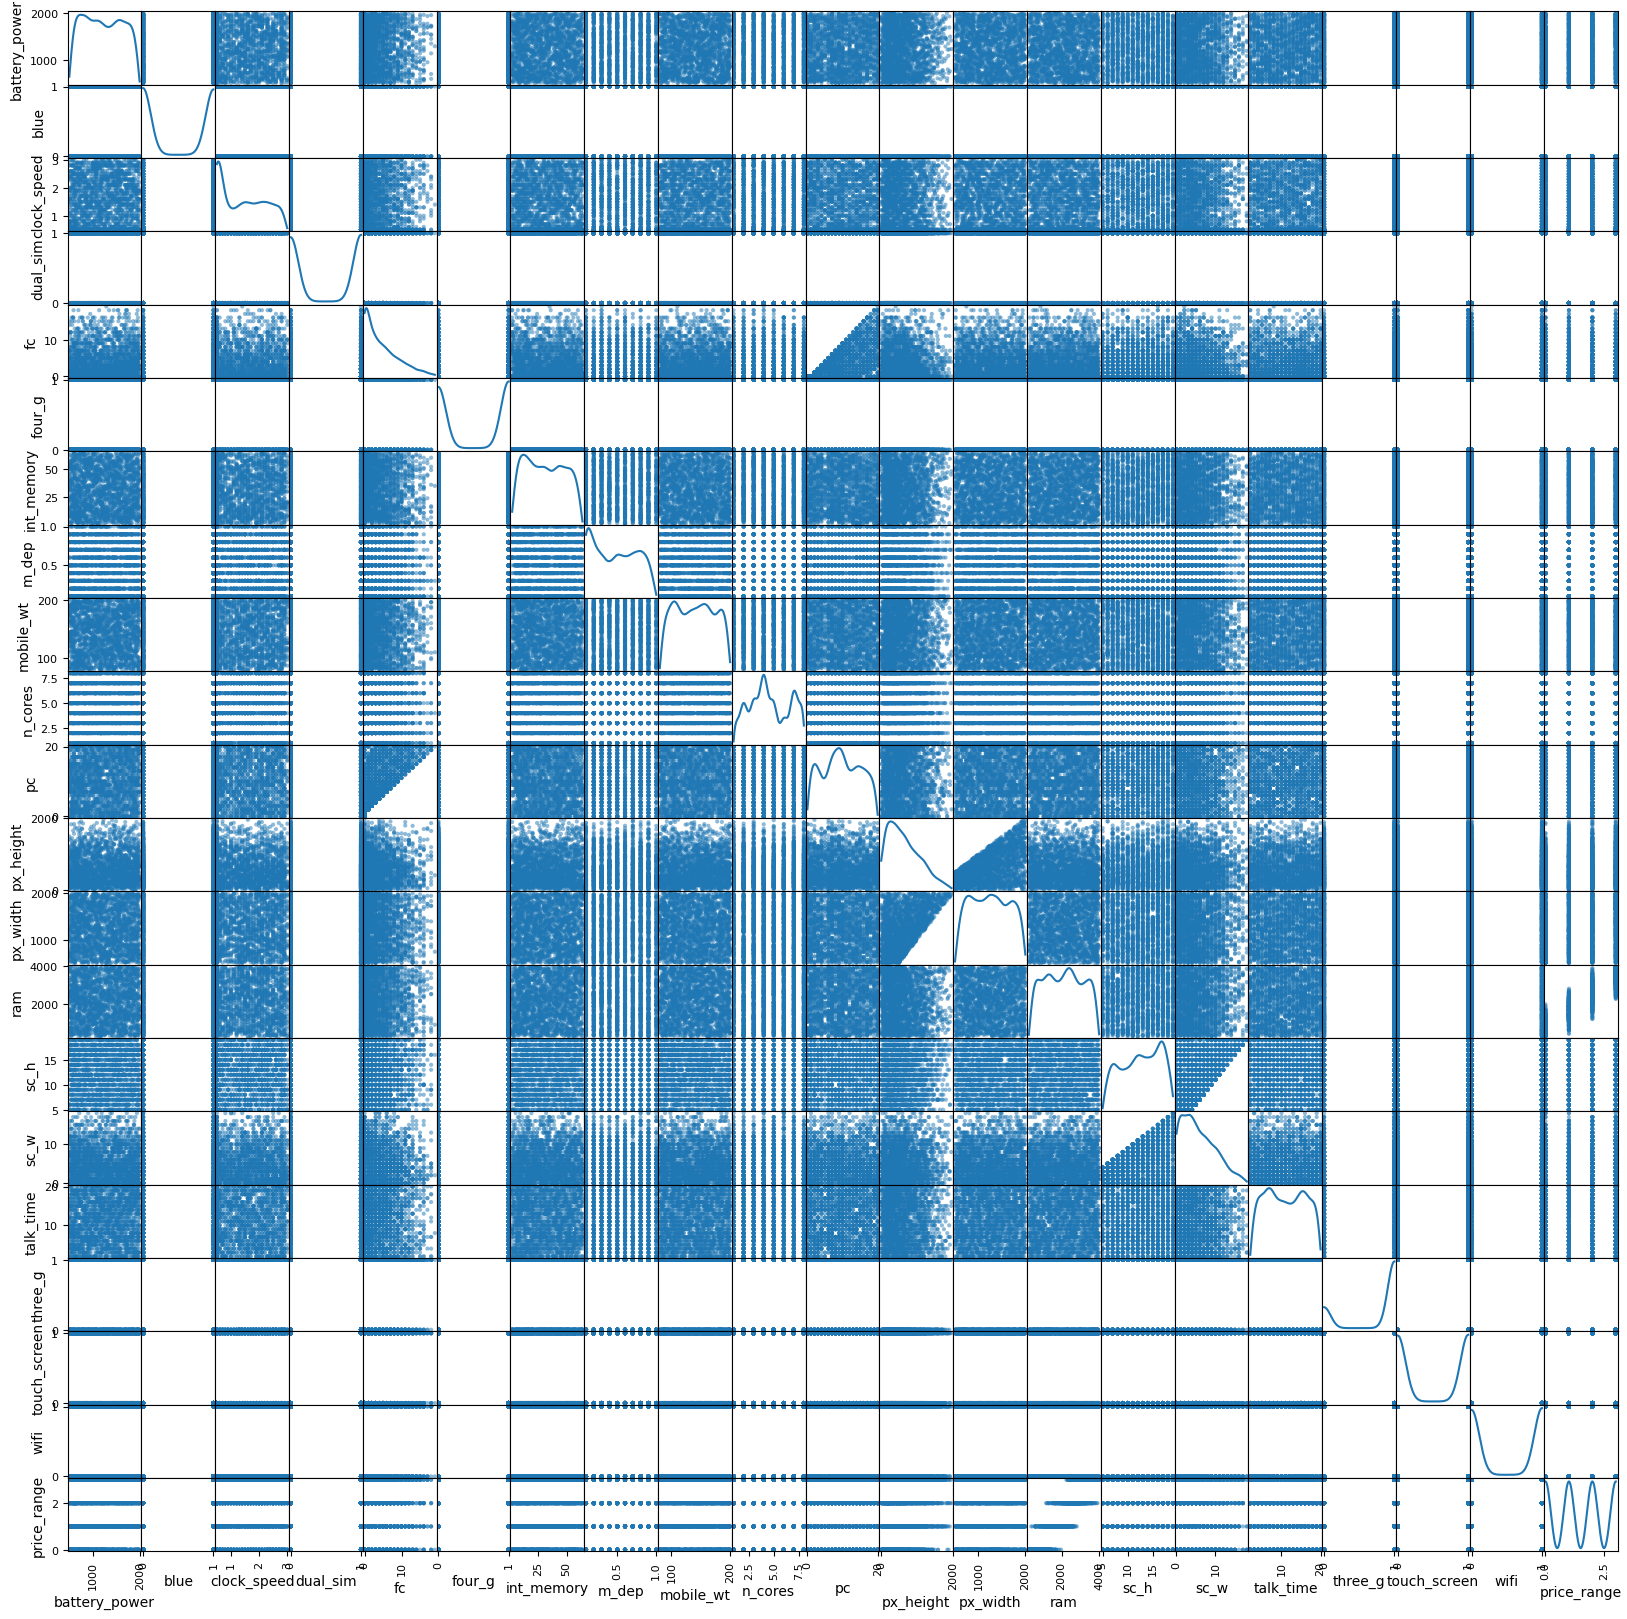

In [18]:
# Scatter Plot Matrix
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(20, 20))

# PART B. DATA CLEANING 

## a. Handling Missing Values

In the context of data, missing values refer to the absence of a particular value or information in a dataset. When data is collected or recorded, it is expected that every variable or attribute has a corresponding value for each observation or data point. However, missing values occur when no data or information is available for a particular variable for one or more observations.

Missing values can occur for various reasons, including human error during data collection, malfunctioning equipment, non-response in surveys or questionnaires, data corruption, or intentional omission. For example, a survey participant may choose not to answer a specific question, resulting in a missing value for that particular variable.

Missing values can be represented in different ways, depending on the data format and the data analysis software being used. Common representations of missing values include blank cells, placeholders like "N/A" or "NaN" (Not a Number), or specific codes assigned to indicate missingness, such as "-99" or "-9999".

Handling missing values is an important aspect of data analysis and requires careful consideration. Ignoring missing values or treating them improperly can lead to biased or inaccurate results. Therefore, appropriate techniques for handling missing values, such as deletion, imputation, or advanced statistical methods, should be applied to ensure robust and valid data analysis.

Fortunately, since the dataset under consideration is complete and devoid of any missing values, there is no need to employ any specific techniques or methodologies to handle the absence of data points. This absence of missing values simplifies the data analysis process, allowing for a more streamlined and straightforward exploration of the dataset and enabling the application of various data mining techniques to extract valuable insights.

## b. Handling Noise

Frequency binning can be used in data mining to handle noise in datasets. The process involves dividing the data into frequency intervals or bins, and then applying noise reduction techniques to each bin individually. This helps to reduce the impact of noise on the overall dataset and improve the accuracy of data mining algorithms.

In certain scenarios, when dealing with an attribute whose distribution is significantly skewed or concentrated beyond a certain threshold, it might be beneficial to apply a binning process. Binning involves grouping values into intervals or bins based on predefined criteria.

In this case, we are specifically interested in values that are less than -0.05 or greater than 0.05. These extreme values may be outliers or indicate unusual patterns in the data. By binning them, we can better understand and analyze their impact on the overall dataset. It's important to note that the choice of binning thresholds (-0.05 and 0.05 in this case) should be carefully considered based on domain knowledge and the specific characteristics of the data. Binning can be a useful technique to handle extreme values and uncover meaningful patterns within a dataset.

In [19]:
df_copy = df.copy()
df_discretize = df.copy()

In [20]:
# Initialize labels 
labels_2 = '0', '1' # 0 low, 1 high
labels_3 = '0', '1', '2', # 0 low, 1 medium, 2 high
labels_4 = '0', '1', '2', '3' # 0 low, 1 medium, 2 high, 3 very high
dict_yn = {0:'No' , 1:'Yes'}

### Att 1 - battery_power

In [21]:
# For binning
qc = pd.qcut(df['battery_power'], q=4, precision=0, labels = labels_4)
df_copy['battery_power'] = qc

# For discretize data
discretize = pd.qcut(df['battery_power'], q=4, precision=0)
df_discretize['battery_power'] = discretize

<Axes: >

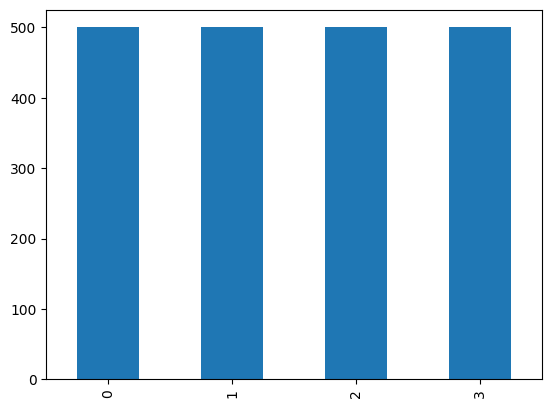

In [22]:
df_copy['battery_power'].value_counts().sort_index().plot(kind='bar')

### Att 2 - blue

In [23]:
# For discretize data
df_discretize['blue'] = df_discretize['blue'].map(dict_yn)

### Att 3 - clock_speed

In [24]:
# For binning
qc = pd.qcut(df['clock_speed'], q=4, precision=0, labels = labels_4)
df_copy['clock_speed'] = qc

# For discretize data
discretize = pd.qcut(df['clock_speed'], q=4, precision=0)
df_discretize['clock_speed'] = discretize

<Axes: >

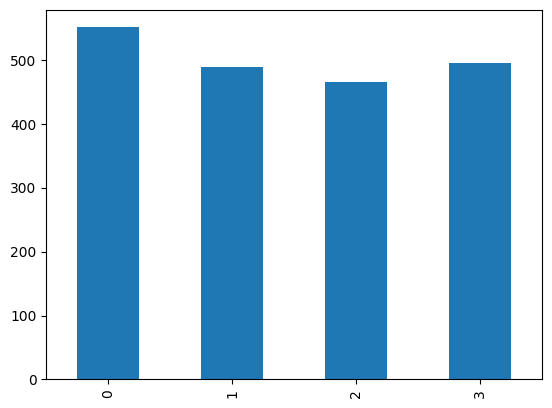

In [25]:
df_copy['clock_speed'].value_counts().sort_index().plot(kind='bar')

### Att 4 - dual_sim

In [26]:
# For discretize data
df_discretize['dual_sim'] = df_discretize['dual_sim'].map(dict_yn)

### Att 5 - fc

In [27]:
# For binning
qc = pd.qcut(df['fc'], q=3, precision=0, labels = labels_3)
df_copy['fc'] = qc

# For discretize data
discretize = pd.qcut(df['fc'], q=3, precision=0)
df_discretize['fc'] = discretize

<Axes: >

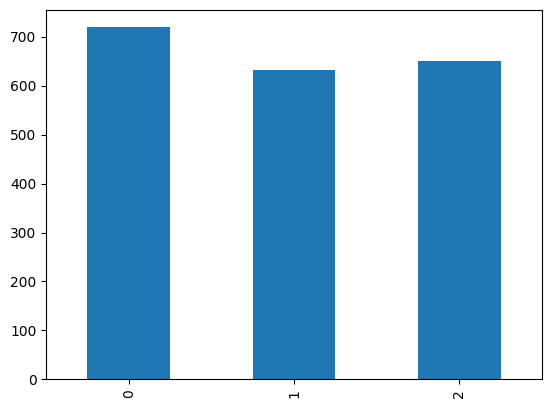

In [28]:
df_copy['fc'].value_counts().sort_index().plot(kind='bar')

### Att 6 - four_g

In [29]:
# For discretize data
df_discretize['four_g'] = df_discretize['four_g'].map(dict_yn)

### Att 7 - int_memory

In [30]:
# For binning
qc = pd.qcut(df['int_memory'], q=3, precision=0, labels = labels_3)
df_copy['int_memory'] = qc

# For discretize data
discretize = pd.qcut(df['int_memory'], q=3, precision=0)
df_discretize['int_memory'] = discretize

<Axes: >

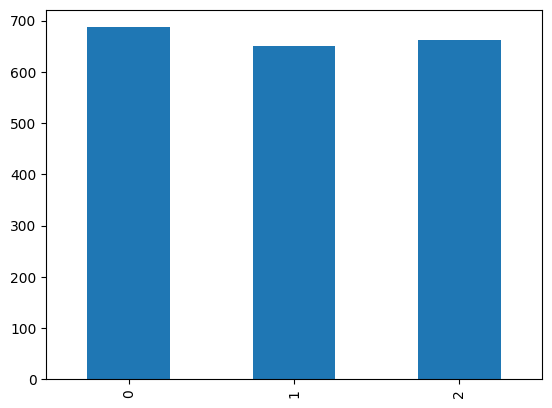

In [31]:
df_copy['int_memory'].value_counts().sort_index().plot(kind='bar')

### Att 8 - m_dep

In [32]:
# For binning
qc = pd.qcut(df['m_dep'], q=3, precision=0, labels = labels_3)
df_copy['m_dep'] = qc

# For discretize data
discretize = pd.qcut(df['m_dep'], q=3, precision=0)
df_discretize['m_dep'] = discretize

<Axes: >

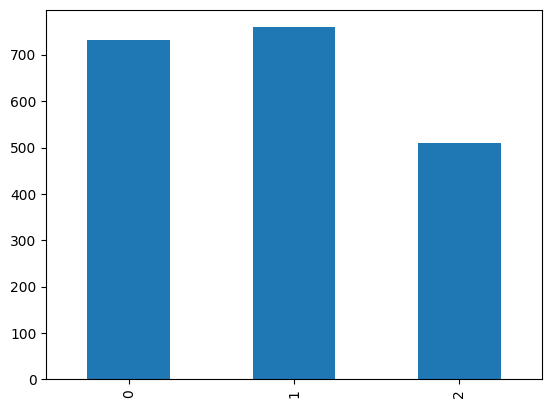

In [33]:
df_copy['m_dep'].value_counts().sort_index().plot(kind='bar')

### Att 9 - mobile_wt

In [34]:
# For binning
qc = pd.qcut(df['mobile_wt'], q=3, precision=0, labels = labels_3)
df_copy['mobile_wt'] = qc

# For discretize data
discretize = pd.qcut(df['mobile_wt'], q=3, precision=0)
df_discretize['mobile_wt'] = discretize

<Axes: >

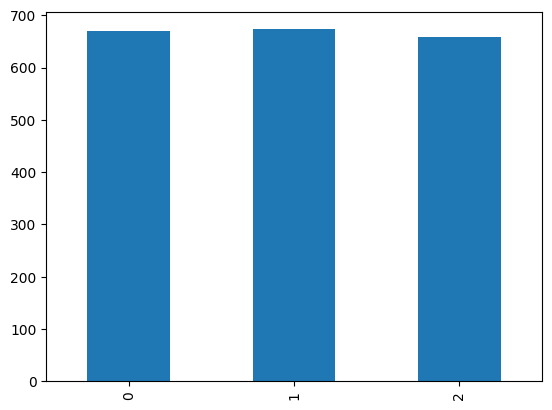

In [35]:
df_copy['mobile_wt'].value_counts().sort_index().plot(kind='bar')

### Att 10 - n_cores

<Axes: >

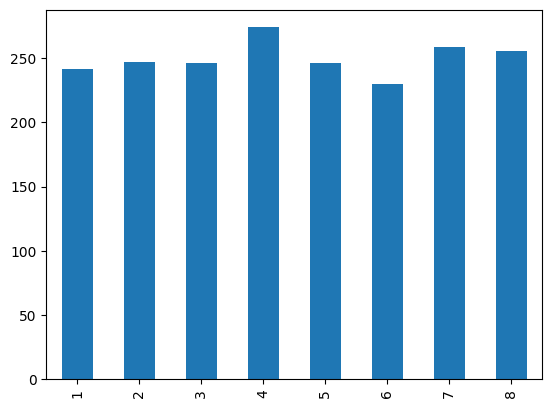

In [36]:
df_copy['n_cores'].value_counts().sort_index().plot(kind='bar')

### Att 11 - pc

In [37]:
# For binning
qc = pd.qcut(df['pc'], q=3, precision=0, labels = labels_3)
df_copy['pc'] = qc

# For discretize data
discretize = pd.qcut(df['pc'], q=3, precision=0)
df_discretize['pc'] = discretize

<Axes: >

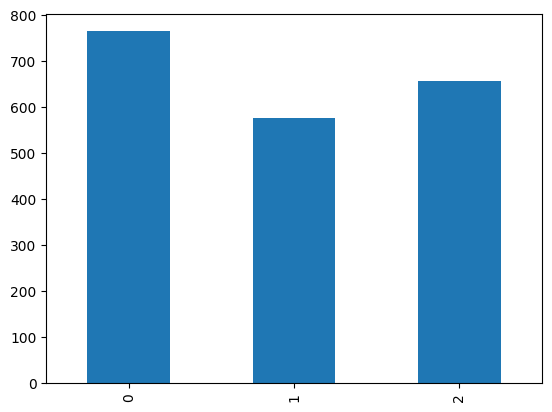

In [38]:
df_copy['pc'].value_counts().sort_index().plot(kind='bar')

### Att 12 - px_height

In [39]:
# For binning
qc = pd.qcut(df['px_height'], q=3, precision=0, labels = labels_3)
df_copy['px_height'] = qc

# For discretize data
discretize = pd.qcut(df['px_height'], q=3, precision=0)
df_discretize['px_height'] = discretize

<Axes: >

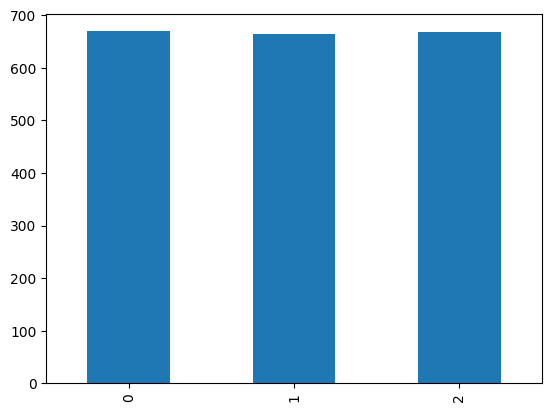

In [40]:
df_copy['px_height'].value_counts().sort_index().plot(kind='bar')

### Att 13 - px_width

In [41]:
# For binning
qc = pd.qcut(df['px_width'], q=3, precision=0, labels = labels_3)
df_copy['px_width'] = qc

# For discretize data
discretize = pd.qcut(df['px_width'], q=3, precision=0)
df_discretize['px_width'] = discretize

<Axes: >

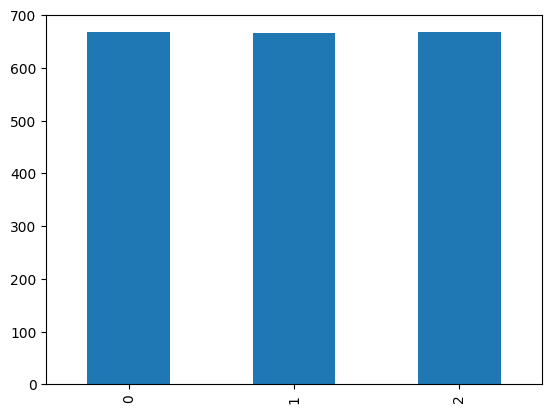

In [42]:
df_copy['px_width'].value_counts().sort_index().plot(kind='bar')

### Att 14 - ram

In [43]:
# For binning
qc = pd.qcut(df['ram'], q=3, precision=0, labels = labels_3)
df_copy['ram'] = qc

# For discretize data
discretize = pd.qcut(df['ram'], q=3, precision=0)
df_discretize['ram'] = discretize

<Axes: >

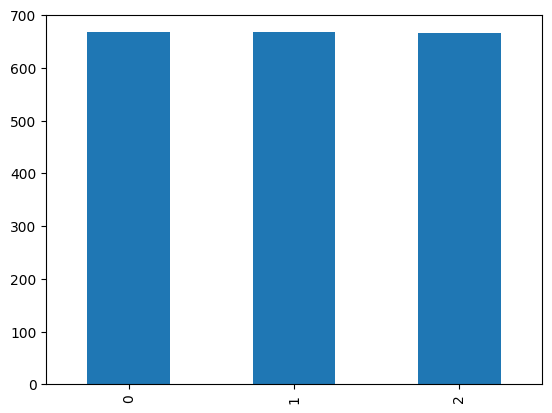

In [44]:
df_copy['ram'].value_counts().sort_index().plot(kind='bar')

### Att 15 - sc_h

In [45]:
# For binning
qc = pd.qcut(df['sc_h'], q=2, precision=0, labels = labels_2)
df_copy['sc_h'] = qc

# For discretize data
discretize = pd.qcut(df['sc_h'], q=2, precision=0)
df_discretize['sc_h'] = discretize

<Axes: >

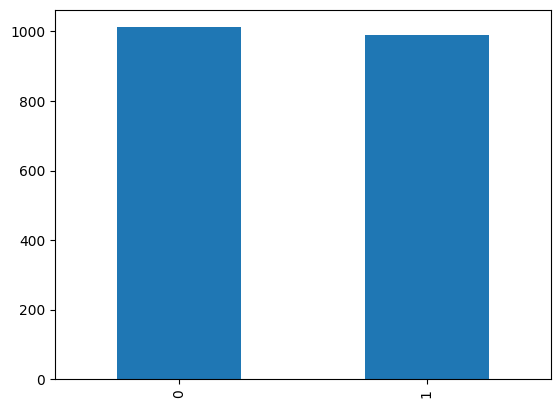

In [46]:
df_copy['sc_h'].value_counts().sort_index().plot(kind='bar')

### Att 16 - sc_w

In [47]:
# For binning
qc = pd.qcut(df['sc_w'], q=3, precision=0, labels = labels_3)
df_copy['sc_w'] = qc

# For discretize data
discretize = pd.qcut(df['sc_w'], q=3, precision=0)
df_discretize['sc_w'] = discretize

<Axes: >

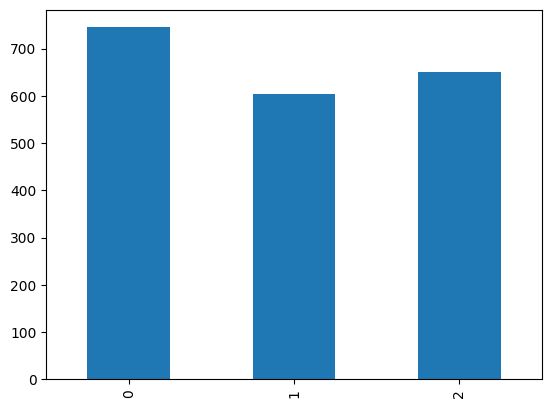

In [48]:
df_copy['sc_w'].value_counts().sort_index().plot(kind='bar')

### Att 17 - talk_time

In [49]:
# For binning
qc = pd.qcut(df['talk_time'], q=2, precision=0, labels = labels_2)
df_copy['talk_time'] = qc

# For discretize data
discretize = pd.qcut(df['talk_time'], q=2, precision=0)
df_discretize['talk_time'] = discretize

<Axes: >

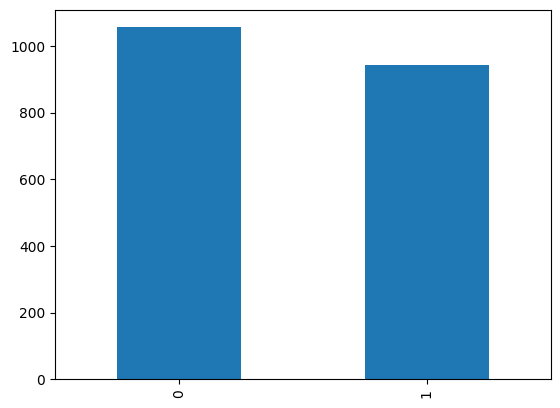

In [50]:
df_copy['talk_time'].value_counts().sort_index().plot(kind='bar')

### Att 18 - three_g

In [51]:
# For discretize data
df_discretize['three_g'] = df_discretize['three_g'].map(dict_yn)

### Att 19 - touch_screen

In [52]:
# For discretize data
df_discretize['touch_screen'] = df_discretize['touch_screen'].map(dict_yn)

### Att 20 - wifi

In [53]:
# For discretize data
df_discretize['wifi'] = df_discretize['wifi'].map(dict_yn)

### Att 21 - price_range

In [54]:
dict_pr = {0:'low cost', 1:'medium cost', 2:'high cost', 3:'very high cost'}

# For discretize data
df_discretize['price_range'] = df_discretize['price_range'].map(dict_pr)

### Changing data type

During the binning process, when we label each bin, the data type of the column changes from numerical to a categorical value. This is because the bins represent categories or ranges rather than specific numerical values. However, in some cases, it might be necessary to convert the data type back to integers.

Changing the data type back to integers allows for easier numerical operations and calculations on the binned column. It also ensures compatibility with certain statistical methods and machine learning algorithms that expect numerical inputs.

In [55]:
df_copy = df_copy.astype(int)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   blue           2000 non-null   int64
 2   clock_speed    2000 non-null   int64
 3   dual_sim       2000 non-null   int64
 4   fc             2000 non-null   int64
 5   four_g         2000 non-null   int64
 6   int_memory     2000 non-null   int64
 7   m_dep          2000 non-null   int64
 8   mobile_wt      2000 non-null   int64
 9   n_cores        2000 non-null   int64
 10  pc             2000 non-null   int64
 11  px_height      2000 non-null   int64
 12  px_width       2000 non-null   int64
 13  ram            2000 non-null   int64
 14  sc_h           2000 non-null   int64
 15  sc_w           2000 non-null   int64
 16  talk_time      2000 non-null   int64
 17  three_g        2000 non-null   int64
 18  touch_screen   2000 non-null   int64
 19  wifi  

## c. Handling Inconsistent Data

Inconsistent data can significantly impact the accuracy and reliability of data mining analyses. Data mining involves extracting meaningful patterns, relationships, and insights from large datasets, making data quality and consistency crucial. In this essay, we will delve into the concept of inconsistent data in data mining, its causes, and explore various strategies and best practices for handling such data effectively. Inconsistent data refers to conflicting or contradictory information within a dataset. It can manifest in different ways, including errors during data entry, integration of data from multiple sources, incomplete or missing values, redundancy, duplication, and inaccurate measurements. These inconsistencies make it challenging to derive meaningful patterns and relationships from the data, leading to unreliable analysis results.

Examples of Inconsistent Data:
* Inconsistent spellings: Differently spelled names for the same individual, such as "John Smith" and "Jon Smit."
* Conflicting values: Discrepancies in product prices, like 1000 and 1200 for the same item.
* Missing attribute values: Absence of critical information, such as age or address, within certain records.
* Inconsistent units of measurement: Varied units like kilograms and pounds used for the same attribute.
* Duplicated records: Multiple entries for the same customer with slight variations in attributes.
* Contradictory information: Respondents providing conflicting answers to similar survey questions.

Handling Inconsistent Data:
* Data cleaning: Correct errors, standardize formats, remove duplicates, and address missing values using techniques like imputation or deletion.
* Data integration: Reconcile differences and inconsistencies when merging data from multiple sources.
* Data transformation: Convert units, scale values, or apply mathematical operations to normalize the data.
* Outlier detection: Identify and handle extreme values that introduce inconsistencies.
* Domain knowledge and expert judgment: Leverage expertise to make informed decisions during data preprocessing.
* Iterative data exploration: Utilize visualizations, statistical analysis, and iterative techniques to identify patterns and refine preprocessing steps.

Handling inconsistent data is a critical step in data mining to ensure accurate and reliable analysis results. By employing strategies such as data cleaning, integration, transformation, outlier detection, and leveraging domain knowledge, researchers and analysts can address inconsistencies effectively, improving the quality and consistency of data. These best practices enhance the validity and reliability of data mining analyses, leading to more meaningful patterns, relationships, and insights that can drive informed decision-making and foster advancements in various fields.

Fortunately, in this particular scenario, there is no need to handle inconsistent data as the dataset provided is free from such issues. This means that the data is consistent and reliable, without any conflicting or contradictory information. Without the presence of inconsistencies, the data can be directly utilized for data mining and analysis purposes. This allows us to proceed with confidence, focusing on extracting meaningful patterns, relationships, and insights from the dataset, while being assured of the data's quality and consistency. By leveraging this consistent data, valuable insights can be derived, enabling informed decision-making and fostering advancements in this study.


# PART C. DATA REDUCTION

## a. Dimensionality Reduction

In [56]:
df_copy.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,0,2,0,0,0,0,1,2,2,0,0,0,1,0,1,1,0,0,1,1
1,1,1,0,1,0,1,2,1,1,3,0,2,2,1,1,0,0,1,1,0,2
2,0,1,0,1,1,1,1,2,1,5,0,2,2,1,0,0,0,1,1,0,2
3,0,1,3,0,0,0,0,2,1,6,1,2,2,2,1,2,0,1,0,0,2
4,3,1,1,0,2,1,2,1,1,2,2,2,1,0,0,0,1,1,1,0,1


In [57]:
from sklearn.ensemble import ExtraTreesClassifier

array = df_copy.values
X = array[:,0:20]
Y = array[:,20]

# Feature extraction
model = ExtraTreesClassifier(n_estimators=100, random_state=1)
model.fit(X, Y)

count = 0
for i in range(20):
  if (model.feature_importances_[i] > 0.035):
    print(f'{model.feature_importances_[i]:.4f} {df_copy.columns[i]}')
    count += 1

print(f'\nNumber of features: {count}')

0.0641 battery_power
0.0403 clock_speed
0.0353 fc
0.0367 int_memory
0.0365 m_dep
0.0357 mobile_wt
0.0483 n_cores
0.0364 pc
0.0391 px_height
0.0396 px_width
0.3544 ram
0.0359 sc_w

Number of features: 12


In [58]:
df_dreduction = df_copy[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_w', 'price_range']]
df_dreduction

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_w,price_range
0,0,2,0,0,1,2,2,0,0,0,1,1,1
1,1,0,0,2,1,1,3,0,2,2,1,0,2
2,0,0,1,1,2,1,5,0,2,2,1,0,2
3,0,3,0,0,2,1,6,1,2,2,2,2,2
4,3,1,2,2,1,1,2,2,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,2,0,6,2,2,2,0,1,0
1996,3,3,0,1,0,2,4,0,2,2,1,2,2
1997,3,1,0,1,1,0,8,0,2,2,2,0,3
1998,2,1,1,2,0,1,5,0,0,0,0,2,0


## b. Numerosity Reduction

## c. Data Transformation

In [59]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = df_dreduction.values
X = array[:,0:12]
Y = array[:,12]

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.    0.667 0.    0.    0.5   1.    0.143 0.    0.    0.    0.5   0.5  ]
 [0.333 0.    0.    1.    0.5   0.5   0.286 0.    1.    1.    0.5   0.   ]
 [0.    0.    0.5   0.5   1.    0.5   0.571 0.    1.    1.    0.5   0.   ]
 [0.    1.    0.    0.    1.    0.5   0.714 0.5   1.    1.    1.    1.   ]
 [1.    0.333 1.    1.    0.5   0.5   0.143 1.    1.    0.5   0.    0.   ]]


In [60]:
X_transform = pd.DataFrame(rescaledX, columns=['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_w'])
X_transform

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_w
0,0.000000,0.666667,0.0,0.0,0.5,1.0,0.142857,0.0,0.0,0.0,0.5,0.5
1,0.333333,0.000000,0.0,1.0,0.5,0.5,0.285714,0.0,1.0,1.0,0.5,0.0
2,0.000000,0.000000,0.5,0.5,1.0,0.5,0.571429,0.0,1.0,1.0,0.5,0.0
3,0.000000,1.000000,0.0,0.0,1.0,0.5,0.714286,0.5,1.0,1.0,1.0,1.0
4,1.000000,0.333333,1.0,1.0,0.5,0.5,0.142857,1.0,1.0,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.000000,0.0,0.0,1.0,0.0,0.714286,1.0,1.0,1.0,0.0,0.5
1996,1.000000,1.000000,0.0,0.5,0.0,1.0,0.428571,0.0,1.0,1.0,0.5,1.0
1997,1.000000,0.333333,0.0,0.5,0.5,0.0,1.000000,0.0,1.0,1.0,1.0,0.0
1998,0.666667,0.333333,0.5,1.0,0.0,0.5,0.571429,0.0,0.0,0.0,0.0,1.0


In [61]:
df_transform = pd.concat([X_transform, df_dreduction['price_range']], axis=1)
df_transform

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_w,price_range
0,0.000000,0.666667,0.0,0.0,0.5,1.0,0.142857,0.0,0.0,0.0,0.5,0.5,1
1,0.333333,0.000000,0.0,1.0,0.5,0.5,0.285714,0.0,1.0,1.0,0.5,0.0,2
2,0.000000,0.000000,0.5,0.5,1.0,0.5,0.571429,0.0,1.0,1.0,0.5,0.0,2
3,0.000000,1.000000,0.0,0.0,1.0,0.5,0.714286,0.5,1.0,1.0,1.0,1.0,2
4,1.000000,0.333333,1.0,1.0,0.5,0.5,0.142857,1.0,1.0,0.5,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.000000,0.0,0.0,1.0,0.0,0.714286,1.0,1.0,1.0,0.0,0.5,0
1996,1.000000,1.000000,0.0,0.5,0.0,1.0,0.428571,0.0,1.0,1.0,0.5,1.0,2
1997,1.000000,0.333333,0.0,0.5,0.5,0.0,1.000000,0.0,1.0,1.0,1.0,0.0,3
1998,0.666667,0.333333,0.5,1.0,0.0,0.5,0.571429,0.0,0.0,0.0,0.0,1.0,0


# PART D. RESULTS PRESENTATION AND VISUALISATION

## Histogram (After)

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'fc'}>,
        <Axes: title={'center': 'int_memory'}>],
       [<Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>,
        <Axes: title={'center': 'pc'}>],
       [<Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_w'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

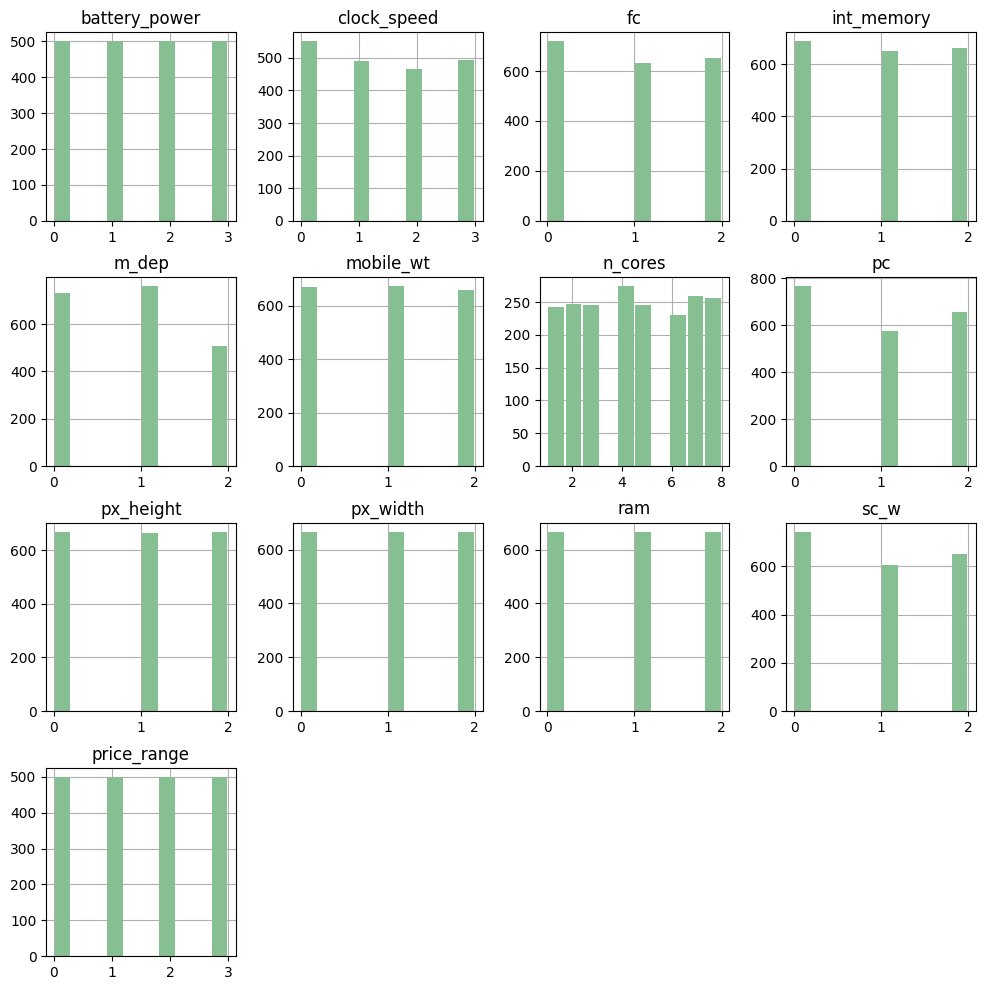

In [62]:
df_dreduction.hist(figsize=(12,12), color='#86bf91', zorder=2, rwidth=0.9)

## Raw Data

In [63]:
df.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


## Cleaned Data

In [64]:
df_copy.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,0,2,0,0,0,0,1,2,2,0,0,0,1,0,1,1,0,0,1,1
1,1,1,0,1,0,1,2,1,1,3,0,2,2,1,1,0,0,1,1,0,2
2,0,1,0,1,1,1,1,2,1,5,0,2,2,1,0,0,0,1,1,0,2
3,0,1,3,0,0,0,0,2,1,6,1,2,2,2,1,2,0,1,0,0,2
4,3,1,1,0,2,1,2,1,1,2,2,2,1,0,0,0,1,1,1,0,1
5,3,0,0,1,1,0,1,1,2,1,0,2,2,0,1,0,0,1,0,0,1
6,3,0,2,0,1,1,0,2,1,8,1,1,1,2,1,2,1,1,0,1,3
7,3,0,0,1,0,0,1,2,2,4,0,1,1,0,1,0,0,1,1,1,0
8,2,1,0,0,0,0,2,1,2,7,2,1,0,0,1,0,1,1,0,0,0
9,0,1,0,1,1,1,0,0,0,5,2,2,1,0,1,2,1,1,0,0,0


## Discretize Data 

In [65]:
df_discretize.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,"(500.0, 852.0]",No,"(1.5, 2.2]",No,"(-1.0, 1.0]",No,"(1.0, 21.0]","(0.3, 0.7]","(160.0, 200.0]",2,"(-1.0, 7.0]","(-1.0, 371.0]","(499.0, 1006.0]","(1470.0, 2711.0]","(4.0, 12.0]","(3.0, 7.0]","(11.0, 20.0]",No,No,Yes,medium cost
1,"(852.0, 1226.0]",Yes,"(0.4, 0.7]",Yes,"(-1.0, 1.0]",Yes,"(42.0, 64.0]","(0.3, 0.7]","(119.0, 160.0]",3,"(-1.0, 7.0]","(795.0, 1960.0]","(1488.0, 1998.0]","(1470.0, 2711.0]","(12.0, 19.0]","(-1.0, 3.0]","(1.0, 11.0]",Yes,Yes,No,high cost
2,"(500.0, 852.0]",Yes,"(0.4, 0.7]",Yes,"(1.0, 5.0]",Yes,"(21.0, 42.0]","(0.7, 1.0]","(119.0, 160.0]",5,"(-1.0, 7.0]","(795.0, 1960.0]","(1488.0, 1998.0]","(1470.0, 2711.0]","(4.0, 12.0]","(-1.0, 3.0]","(1.0, 11.0]",Yes,Yes,No,high cost
3,"(500.0, 852.0]",Yes,"(2.2, 3.0]",No,"(-1.0, 1.0]",No,"(1.0, 21.0]","(0.7, 1.0]","(119.0, 160.0]",6,"(7.0, 13.0]","(795.0, 1960.0]","(1488.0, 1998.0]","(2711.0, 3998.0]","(12.0, 19.0]","(7.0, 18.0]","(1.0, 11.0]",Yes,No,No,high cost
4,"(1615.0, 1998.0]",Yes,"(0.7, 1.5]",No,"(5.0, 19.0]",Yes,"(42.0, 64.0]","(0.3, 0.7]","(119.0, 160.0]",2,"(13.0, 20.0]","(795.0, 1960.0]","(1006.0, 1488.0]","(255.0, 1470.0]","(4.0, 12.0]","(-1.0, 3.0]","(11.0, 20.0]",Yes,Yes,No,medium cost
5,"(1615.0, 1998.0]",No,"(0.4, 0.7]",Yes,"(1.0, 5.0]",No,"(21.0, 42.0]","(0.3, 0.7]","(160.0, 200.0]",1,"(-1.0, 7.0]","(795.0, 1960.0]","(1488.0, 1998.0]","(255.0, 1470.0]","(12.0, 19.0]","(-1.0, 3.0]","(1.0, 11.0]",Yes,No,No,medium cost
6,"(1615.0, 1998.0]",No,"(1.5, 2.2]",No,"(1.0, 5.0]",Yes,"(1.0, 21.0]","(0.7, 1.0]","(119.0, 160.0]",8,"(7.0, 13.0]","(371.0, 795.0]","(1006.0, 1488.0]","(2711.0, 3998.0]","(12.0, 19.0]","(7.0, 18.0]","(11.0, 20.0]",Yes,No,Yes,very high cost
7,"(1615.0, 1998.0]",No,"(0.4, 0.7]",Yes,"(-1.0, 1.0]",No,"(21.0, 42.0]","(0.7, 1.0]","(160.0, 200.0]",4,"(-1.0, 7.0]","(371.0, 795.0]","(1006.0, 1488.0]","(255.0, 1470.0]","(12.0, 19.0]","(-1.0, 3.0]","(1.0, 11.0]",Yes,Yes,Yes,low cost
8,"(1226.0, 1615.0]",Yes,"(0.4, 0.7]",No,"(-1.0, 1.0]",No,"(42.0, 64.0]","(0.3, 0.7]","(160.0, 200.0]",7,"(13.0, 20.0]","(371.0, 795.0]","(499.0, 1006.0]","(255.0, 1470.0]","(12.0, 19.0]","(-1.0, 3.0]","(11.0, 20.0]",Yes,No,No,low cost
9,"(500.0, 852.0]",Yes,"(0.4, 0.7]",Yes,"(1.0, 5.0]",Yes,"(1.0, 21.0]","(0.0, 0.3]","(79.0, 119.0]",5,"(13.0, 20.0]","(795.0, 1960.0]","(1006.0, 1488.0]","(255.0, 1470.0]","(12.0, 19.0]","(7.0, 18.0]","(11.0, 20.0]",Yes,No,No,low cost


## Discretize Data (After Numerosity Reduction)

In [66]:
df_dreduction.head(20)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_w,price_range
0,0,2,0,0,1,2,2,0,0,0,1,1,1
1,1,0,0,2,1,1,3,0,2,2,1,0,2
2,0,0,1,1,2,1,5,0,2,2,1,0,2
3,0,3,0,0,2,1,6,1,2,2,2,2,2
4,3,1,2,2,1,1,2,2,2,1,0,0,1
5,3,0,1,1,1,2,1,0,2,2,0,0,1
6,3,2,1,0,2,1,8,1,1,1,2,2,3
7,3,0,0,1,2,2,4,0,1,1,0,0,0
8,2,0,0,2,1,2,7,2,1,0,0,0,0
9,0,0,1,0,0,0,5,2,2,1,0,2,0


## Transformed Data

In [67]:
df_transform.head(20)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_w,price_range
0,0.000000,0.666667,0.0,0.0,0.5,1.0,0.142857,0.0,0.0,0.0,0.5,0.5,1
1,0.333333,0.000000,0.0,1.0,0.5,0.5,0.285714,0.0,1.0,1.0,0.5,0.0,2
2,0.000000,0.000000,0.5,0.5,1.0,0.5,0.571429,0.0,1.0,1.0,0.5,0.0,2
3,0.000000,1.000000,0.0,0.0,1.0,0.5,0.714286,0.5,1.0,1.0,1.0,1.0,2
4,1.000000,0.333333,1.0,1.0,0.5,0.5,0.142857,1.0,1.0,0.5,0.0,0.0,1
5,1.000000,0.000000,0.5,0.5,0.5,1.0,0.000000,0.0,1.0,1.0,0.0,0.0,1
6,1.000000,0.666667,0.5,0.0,1.0,0.5,1.000000,0.5,0.5,0.5,1.0,1.0,3
7,1.000000,0.000000,0.0,0.5,1.0,1.0,0.428571,0.0,0.5,0.5,0.0,0.0,0
8,0.666667,0.000000,0.0,1.0,0.5,1.0,0.857143,1.0,0.5,0.0,0.0,0.0,0
9,0.000000,0.000000,0.5,0.0,0.0,0.0,0.571429,1.0,1.0,0.5,0.0,1.0,0
